# Final Course Project

# Rainfall Prediction

# Import Libraries

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix



# Uploading Data

In [108]:
df=pd.read_excel("sydney_rain prediction (1).xlsx")

In [109]:
df.head()

df.shape

(3337, 17)

# Data Pre-processing

In [110]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Checking for null values

In [111]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

### Missing Value Imputation For Numerical and Float values

In [112]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().any():
        # Use mean to fill for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

# Display the first few rows to verify the changes
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [113]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       6
RainTomorrow    0
dtype: int64

### For categorical variable filled null vaues with most frequent values i.e mode

In [114]:
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)


In [115]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [116]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

### Checking for outliers in dataset

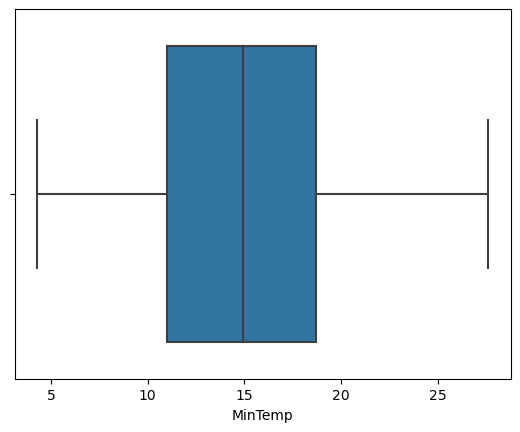

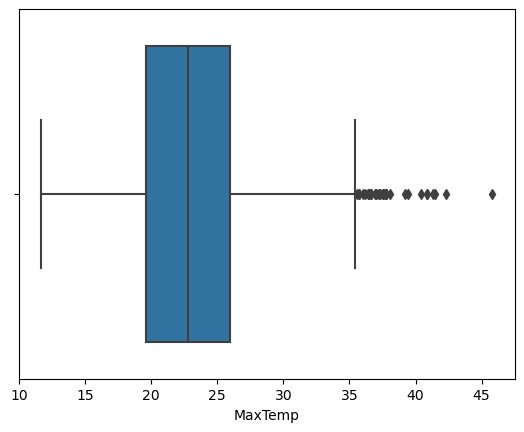

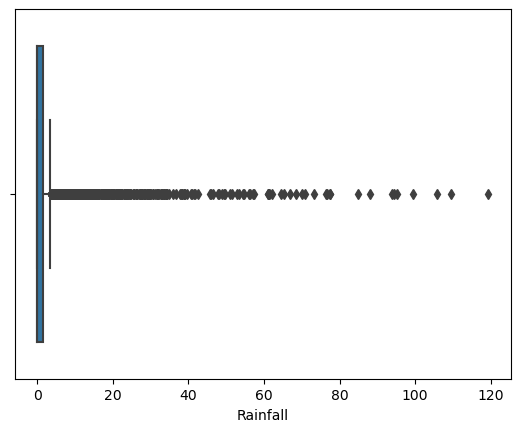

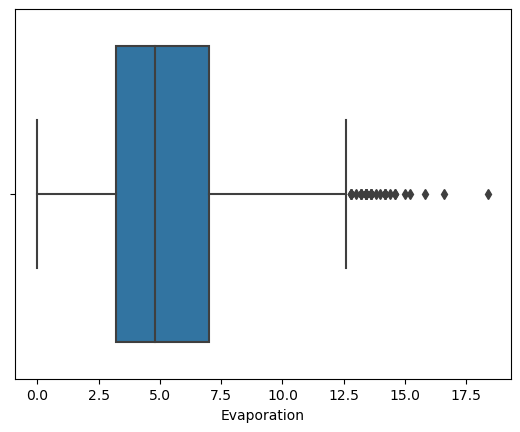

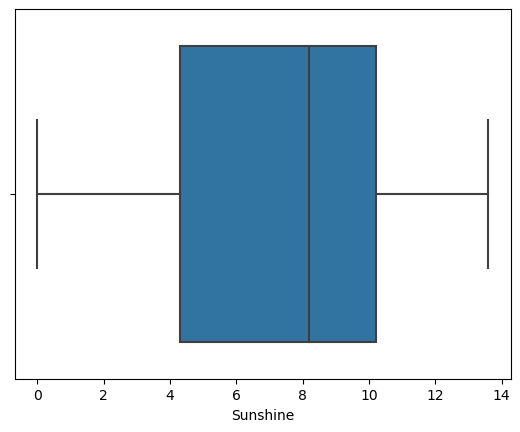

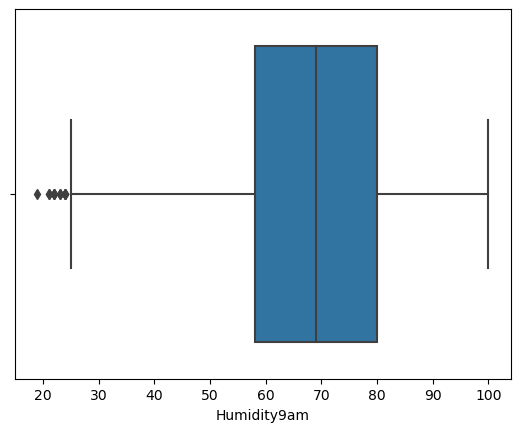

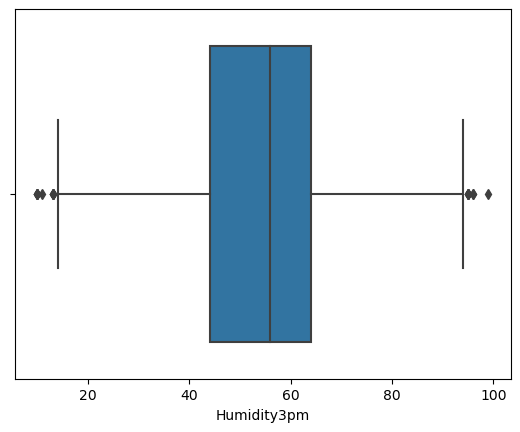

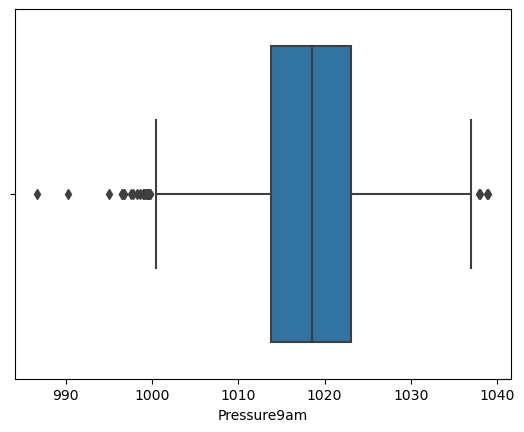

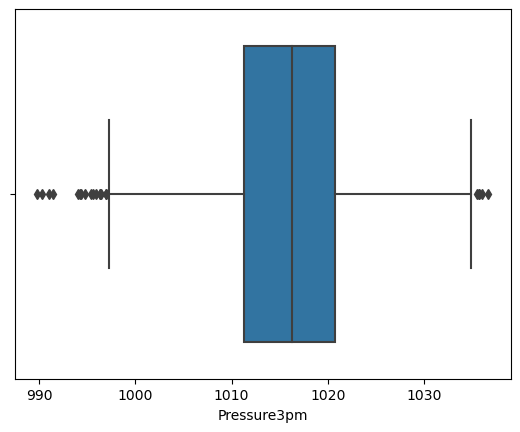

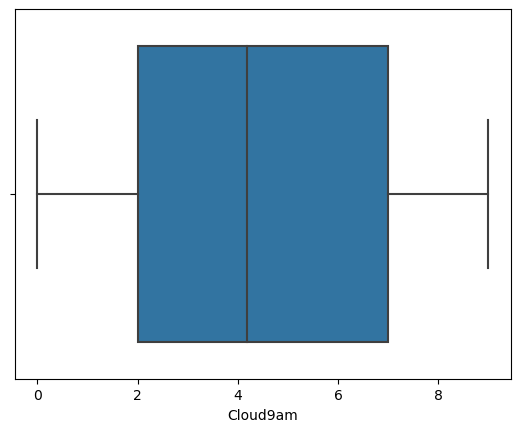

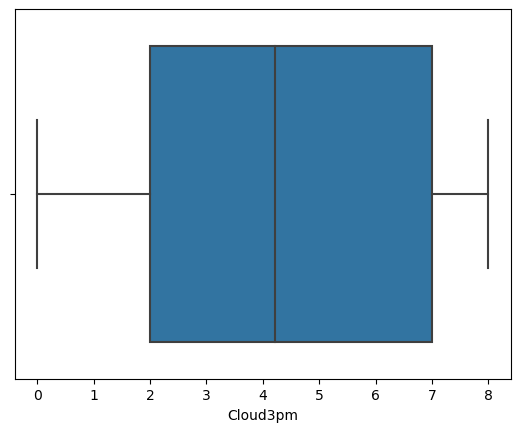

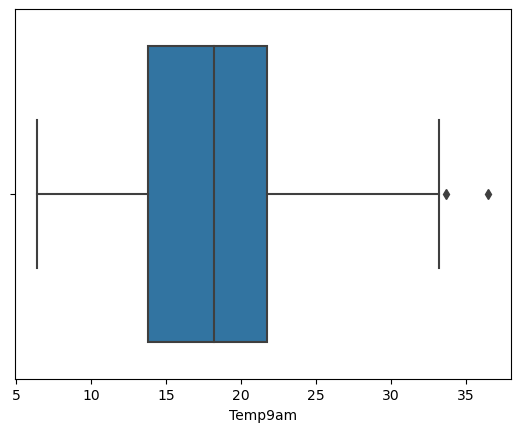

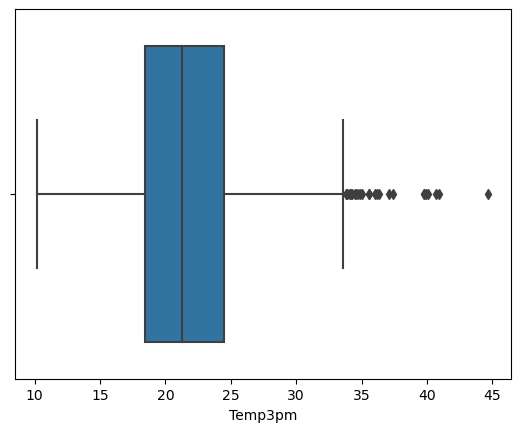

In [117]:
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


### Outlier Treatment

C:\Users\HP HDD\AppData\Local\Temp\ipykernel_20964\24173769.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\HP HDD\AppData\Local\Temp\ipykernel_20964\24173769.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


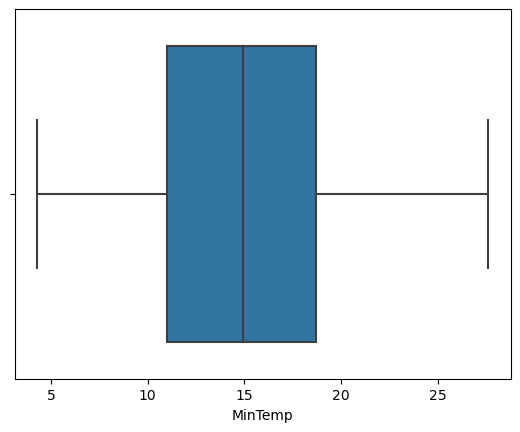

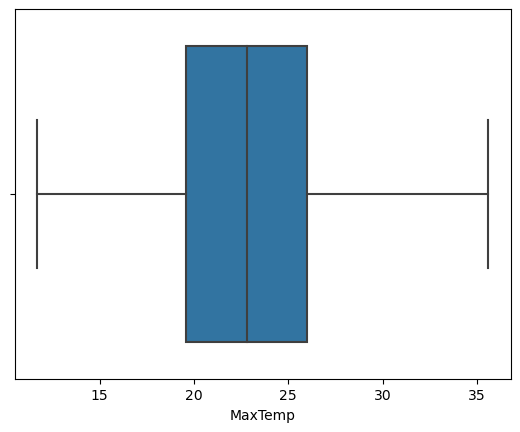

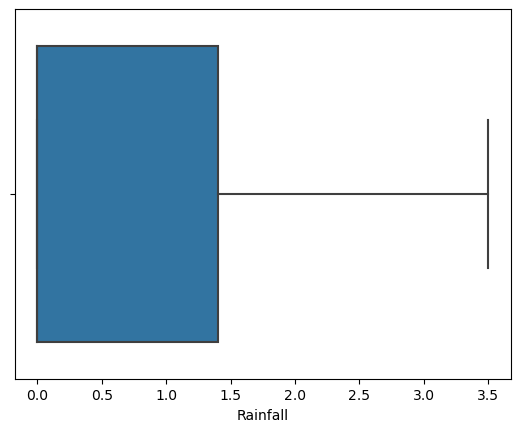

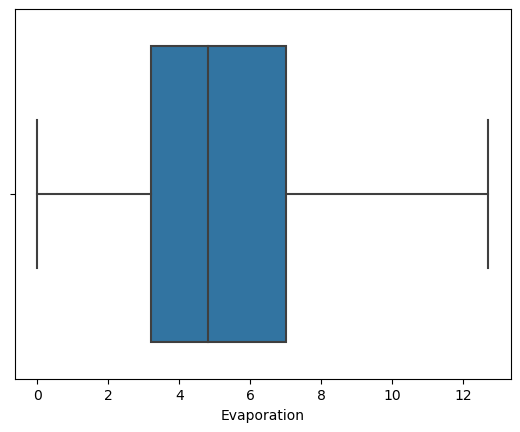

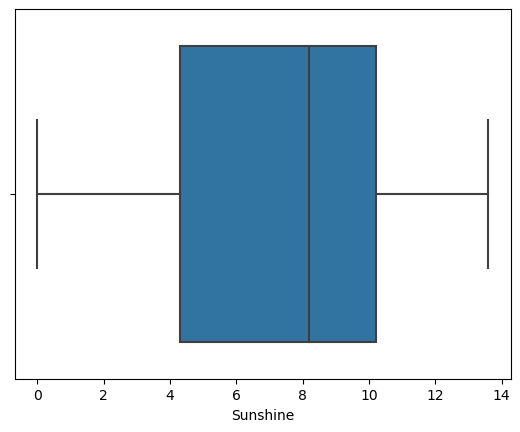

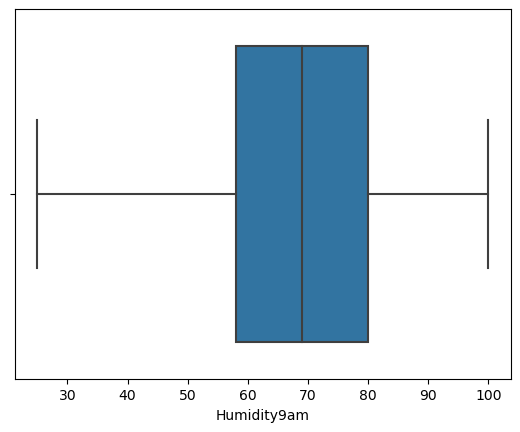

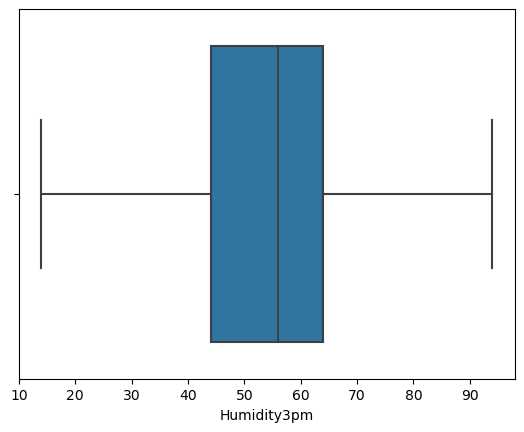

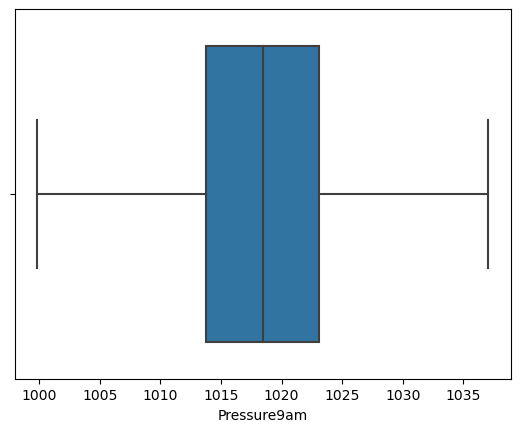

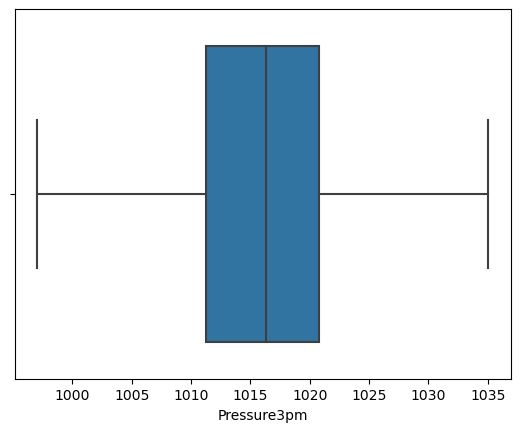

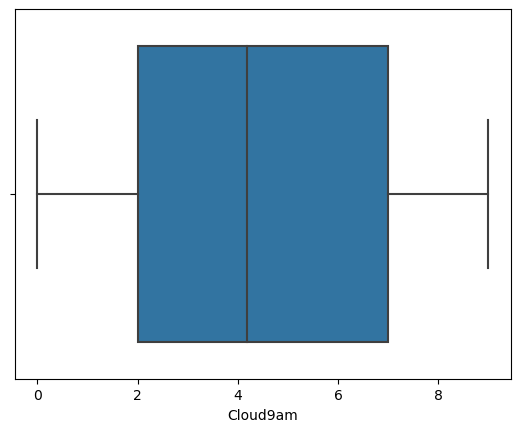

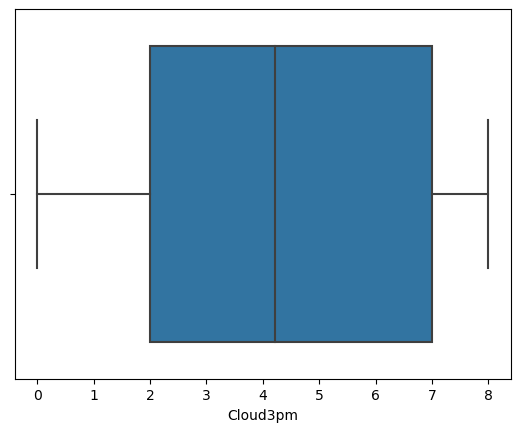

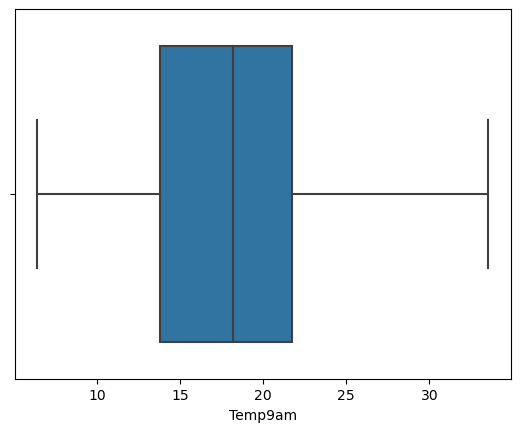

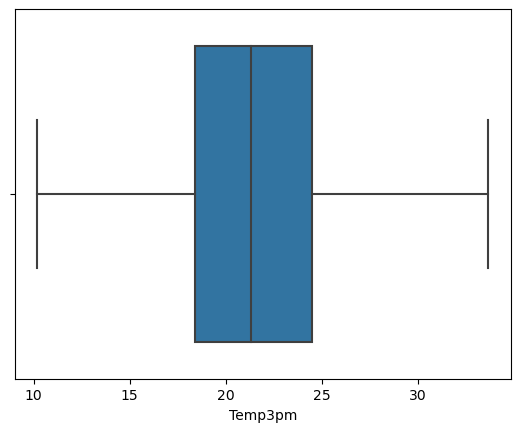

In [118]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


In [119]:
df = pd.get_dummies(df, columns = ['RainToday', 'RainTomorrow'], drop_first = True)

In [120]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.60,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.90,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.70,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.20,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.30,1004.8,8.0,8.0,22.5,25.5,1,1
5,2008-02-06,Sydney,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.70,998.6,6.0,6.0,23.8,26.0,1,1
6,2008-02-07,Sydney,18.6,26.3,3.5,5.200000,5.2,75.0,80.0,999.85,1000.3,4.0,7.0,21.7,22.3,1,1
7,2008-02-08,Sydney,17.2,22.3,3.5,5.800000,2.1,77.0,61.0,1008.30,1007.4,7.0,8.0,18.9,21.1,1,1
8,2008-02-09,Sydney,16.4,20.8,3.5,4.800000,3.0,92.0,91.0,1006.40,1007.6,7.0,7.0,17.1,16.5,1,1
9,2008-02-10,Sydney,14.6,24.2,3.5,4.400000,10.1,80.0,53.0,1014.00,1013.4,4.0,2.0,17.2,23.3,1,0


In [121]:
df=df.drop(['Date'],axis=1)
df=df.drop(['Location'],axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [122]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


## Creating Correlation Matrix

In [123]:
corr_matrix = df.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.775690,0.023171,0.570698,-0.062959,0.052908,0.271728,-0.395526,-0.357223,0.236288,0.163519,0.939013,0.758371,0.018690,0.079962
MaxTemp,0.775690,1.000000,-0.188239,0.512694,0.328741,-0.183404,-0.144058,-0.390471,-0.425164,-0.088230,-0.101725,0.862195,0.960018,-0.188545,-0.151841
Rainfall,0.023171,-0.188239,1.000000,-0.235492,-0.375991,0.418365,0.354544,-0.008021,0.052547,0.329424,0.263782,-0.072416,-0.189999,0.953486,0.358048
Evaporation,0.570698,0.512694,-0.235492,1.000000,0.177087,-0.394423,-0.101240,-0.345633,-0.302191,-0.037937,-0.038892,0.609323,0.479570,-0.230889,-0.063748
Sunshine,-0.062959,0.328741,-0.375991,0.177087,1.000000,-0.489488,-0.583373,-0.046806,-0.096027,-0.660555,-0.676397,0.114541,0.346971,-0.367080,-0.521637
Humidity9am,0.052908,-0.183404,0.418365,-0.394423,-0.489488,1.000000,0.657988,0.263285,0.252339,0.423909,0.331951,-0.147018,-0.154477,0.401023,0.329345
Humidity3pm,0.271728,-0.144058,0.354544,-0.101240,-0.583373,0.657988,1.000000,0.153133,0.182897,0.454424,0.472158,0.129572,-0.204563,0.343130,0.471827
Pressure9am,-0.395526,-0.390471,-0.008021,-0.345633,-0.046806,0.263285,0.153133,1.000000,0.960806,-0.010435,-0.039749,-0.421709,-0.347228,0.000834,-0.032176
Pressure3pm,-0.357223,-0.425164,0.052547,-0.302191,-0.096027,0.252339,0.182897,0.960806,1.000000,0.019873,-0.002591,-0.406225,-0.391848,0.057890,0.011403
Cloud9am,0.236288,-0.088230,0.329424,-0.037937,-0.660555,0.423909,0.454424,-0.010435,0.019873,1.000000,0.608995,0.088716,-0.090757,0.316502,0.329525



1.Temp9am and MinTemp
<br>
2.Temp9am and maxtemp
<br>
3.temp3pm and maxtemp
<br>
4.pressure9am and pressure3pm
<br>
5.temp9am and temp3pm
<br>
are highly correlated with each other

## Defining Dependent(target variable) and independent variables

In [124]:
# Split the dataset into training and testing sets
# Selecting features and target variable
X = df.drop(['RainTomorrow_Yes'], axis=1)  # Features
y = df['RainTomorrow_Yes']  # Target variable

## Train Test Split data

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
y_train.shape

(2669,)

In [127]:
y_test.shape


(668,)

## Applying standard scaler

In [128]:
# Standardize the feature matrix X using StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Use the fit_transform method to standardize the feature matrix X_train
X_train_scaled = scaler.fit_transform(X_train)

# Use the transform method to standardize the feature matrix X_test
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

## Training the data

In [129]:
# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Train the Logistic Regression classifier on the scaled training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

## Predicting the values

In [130]:
# Predict the target variable for the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)


## Evaluating Logistic Regression Model Performance

In [131]:
from sklearn.metrics import roc_auc_score


# Evaluate the model
# Calculate accuracy score for training set

train_accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))
print("Training Accuracy (Logistic Regression):", train_accuracy_log_reg)

# Calculate accuracy score for testing set
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Testing Accuracy (Logistic Regression):", test_accuracy_log_reg)

precision_score_lr = precision_score(y_test, y_pred_log_reg)
print("Precision score for logistic regression:", precision_score_lr)

recall_score_lr = recall_score(y_test, y_pred_log_reg)
print("Recall score for logistic regression:", recall_score_lr)

roc_auc = roc_auc_score(y_test, y_pred_log_reg)
print("ROC AUC Score :", roc_auc)


Training Accuracy (Logistic Regression): 0.8392656425627576
Testing Accuracy (Logistic Regression): 0.8218562874251497
Precision score for logistic regression: 0.7338129496402878
Recall score for logistic regression: 0.5543478260869565
ROC AUC Score : 0.7389507725476105


## Creating Confusion Matrix

In [132]:
confusion_matrix(y_test,y_pred_log_reg)

array([[447,  37],
       [ 82, 102]], dtype=int64)

# Decision Tree classifier
## Training the Model and Predicting Values

In [133]:

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=1)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_scaled)



## Evaluating the Decision Tree Classifier Performance

In [134]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, clf.predict(X_train_scaled))
print("Training Accuracy:", train_accuracy)

# Calculate accuracy score for testing set
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)


recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score :", roc_auc)


Training Accuracy: 0.8235294117647058
Testing Accuracy: 0.8098802395209581
Precision Score: 0.8433734939759037
Recall Score: 0.3804347826086957
ROC AUC Score : 0.6767876392382322


## Creating Confusion matrix

In [135]:
confusion_matrix(y_test,y_pred)

array([[471,  13],
       [114,  70]], dtype=int64)

# K Neighbors Classifier
## Training the Model and Predicting Values

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN classifier
knn_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_knn = knn_clf.predict(X_test_scaled)


## Evaluating the KNN Performance

In [137]:

# Evaluating the model
train_accuracy_knn = accuracy_score(y_train, knn_clf.predict(X_train_scaled))
print("Training Accuracy (KNN):", train_accuracy_knn)

# Calculate accuracy score for testing set
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Testing Accuracy (KNN):", test_accuracy_knn)

# Calculate precision score for testing set
precision_knn = precision_score(y_test, y_pred_knn)
print("Precision Score (KNN):", precision_knn)

# Calculate recall score for testing set
recall_knn = recall_score(y_test, y_pred_knn)
print("Recall Score (KNN):", recall_knn)

roc_auc = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC Score :", roc_auc)


Training Accuracy (KNN): 0.8643686774072686
Testing Accuracy (KNN): 0.8068862275449101
Precision Score (KNN): 0.6708074534161491
Recall Score (KNN): 0.5869565217391305
ROC AUC Score : 0.7387261947538627


## Creating confusion matrix

In [138]:
confusion_matrix(y_test,y_pred_knn)

array([[431,  53],
       [ 76, 108]], dtype=int64)

# Linear Discriminant Analysis
## Training and Predicting values

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

# Initialize the LDA classifier
# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_lda = lda.predict(X_test_scaled)



## Evaluating LDA Performance

In [140]:
# Evaluating the model
train_accuracy_lda = accuracy_score(y_train, lda.predict(X_train_scaled))
print("Training Accuracy (LDA):", train_accuracy_lda)

# Calculate accuracy score for testing set
test_accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Testing Accuracy (LDA):", test_accuracy_lda)

# Calculate precision score for testing set
precision_lda = precision_score(y_test, y_pred_lda)
print("Precision Score (LDA):", precision_lda)

# Calculate recall score for testing set
recall_lda = recall_score(y_test, y_pred_lda)
print("Recall Score (LDA):", recall_lda)

# Calculate ROC AUC score for testing set
roc_auc_lda = roc_auc_score(y_test, y_pred_lda)
print("ROC AUC Score (LDA):", roc_auc_lda)


Training Accuracy (LDA): 0.8332708879730236
Testing Accuracy (LDA): 0.8233532934131736
Precision Score (LDA): 0.72
Recall Score (LDA): 0.5869565217391305
ROC AUC Score (LDA): 0.750089831117499


## Creating confusion matrix

In [141]:
confusion_matrix(y_test,y_pred_lda)

array([[442,  42],
       [ 76, 108]], dtype=int64)

# Bagging Classifier
## Training model and predicting values

In [142]:
from sklearn.ensemble import BaggingClassifier


# Initialize the base Decision Tree classifier
base_clf = DecisionTreeClassifier()

# Initialize the Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_bagging = bagging_clf.predict(X_test_scaled)



C:\Users\HP HDD\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Evaluating performance of bagging classifier

In [143]:
# Evaluating the model
train_accuracy_bagging = accuracy_score(y_train, bagging_clf.predict(X_train_scaled))
print("Training Accuracy (Bagging):", train_accuracy_bagging)

# Calculate accuracy score for testing set
test_accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Testing Accuracy (Bagging):", test_accuracy_bagging)

# Calculate precision score for testing set
precision_bagging = precision_score(y_test, y_pred_bagging)
print("Precision Score (Bagging):", precision_bagging)

# Calculate recall score for testing set
recall_bagging = recall_score(y_test, y_pred_bagging)
print("Recall Score (Bagging):", recall_bagging)

roc_auc = roc_auc_score(y_test, y_pred_bagging)
print("ROC AUC Score :", roc_auc)


Training Accuracy (Bagging): 0.985013113525665
Testing Accuracy (Bagging): 0.811377245508982
Precision Score (Bagging): 0.7196969696969697
Recall Score (Bagging): 0.5163043478260869
ROC AUC Score : 0.7199290334171757


## creating confusion matrix

In [144]:
confusion_matrix(y_test,y_pred_bagging)

array([[447,  37],
       [ 89,  95]], dtype=int64)

# Gradient Boosting Classifier
## Training the model and predicting the values

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Train the Gradient Boosting classifier
gb_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_gb = gb_clf.predict(X_test_scaled)



## Evaluating the performance of Gradient boosting

In [146]:
# Evaluating the model
train_accuracy_gb = accuracy_score(y_train, gb_clf.predict(X_train_scaled))
print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)

# Calculate accuracy score for testing set
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Testing Accuracy (Gradient Boosting):", test_accuracy_gb)

# Calculate precision score for testing set
precision_gb = precision_score(y_test, y_pred_gb)
print("Precision Score (Gradient Boosting):", precision_gb)

# Calculate recall score for testing set
recall_gb = recall_score(y_test, y_pred_gb)
print("Recall Score (Gradient Boosting):", recall_gb)

roc_auc = roc_auc_score(y_test, y_pred_gb)
print("ROC AUC Score :", roc_auc)


Training Accuracy (Gradient Boosting): 0.8816035968527538
Testing Accuracy (Gradient Boosting): 0.8263473053892215
Precision Score (Gradient Boosting): 0.753731343283582
Recall Score (Gradient Boosting): 0.5489130434782609
ROC AUC Score : 0.7403656126482213


## Creating confusion matrix

In [147]:
confusion_matrix(y_test,y_pred_gb)

array([[451,  33],
       [ 83, 101]], dtype=int64)

## Training the gradient boosting with parameters for better accuracy

In [148]:
gb_clf2 = GradientBoostingClassifier(learning_rate = 0.01, n_estimators =1000, max_depth = 1)

# Train the Gradient Boosting classifier
gb_clf2.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_gb2 = gb_clf2.predict(X_test_scaled)


## Evaluating the performance of gradient boosting model with parameter

In [149]:
train_accuracy_gb = accuracy_score(y_train, gb_clf2.predict(X_train_scaled))
print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)

# Calculate accuracy score for testing set
test_accuracy_gb = accuracy_score(y_test, y_pred_gb2)
print("Testing Accuracy (Gradient Boosting):", test_accuracy_gb)

# Calculate precision score for testing set
precision_gb = precision_score(y_test, y_pred_gb2)
print("Precision Score (Gradient Boosting):", precision_gb)

# Calculate recall score for testing set
recall_gb = recall_score(y_test, y_pred_gb2)
print("Recall Score (Gradient Boosting):", recall_gb)

roc_auc = roc_auc_score(y_test, y_pred_gb)
print("ROC AUC Score :", roc_auc)


Training Accuracy (Gradient Boosting): 0.8452603971524916
Testing Accuracy (Gradient Boosting): 0.8308383233532934
Precision Score (Gradient Boosting): 0.8034188034188035
Recall Score (Gradient Boosting): 0.5108695652173914
ROC AUC Score : 0.7403656126482213


## creating the confusion matrix for 2nd gradient boosting

In [150]:
confusion_matrix(y_test,y_pred_gb2)

array([[461,  23],
       [ 90,  94]], dtype=int64)

# AdaBoostClassifier
## Training the model and Predicting the values

In [151]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the base Decision Tree classifier
# Initialize the base Decision Tree classifier

# Initialize the AdaBoost classifier
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_adaboost = adaboost_clf.predict(X_test_scaled)



## Evaluating the performance of Adaboost

In [152]:
# Evaluating the model
train_accuracy_adaboost = accuracy_score(y_train, adaboost_clf.predict(X_train_scaled))
print("Training Accuracy (AdaBoost):", train_accuracy_adaboost)

# Calculate accuracy score for testing set
test_accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Testing Accuracy (AdaBoost):", test_accuracy_adaboost)

# Calculate precision score for testing set
precision_adaboost = precision_score(y_test, y_pred_adaboost)
print("Precision Score (AdaBoost):", precision_adaboost)

# Calculate recall score for testing set
recall_adaboost = recall_score(y_test, y_pred_adaboost)
print("Recall Score (AdaBoost):", recall_adaboost)

roc_auc = roc_auc_score(y_test, y_pred_adaboost)
print("ROC AUC Score :", roc_auc)


Training Accuracy (AdaBoost): 0.8493817909329336
Testing Accuracy (AdaBoost): 0.8188622754491018
Precision Score (AdaBoost): 0.752
Recall Score (AdaBoost): 0.5108695652173914
ROC AUC Score : 0.7234099892202659


## AdaBoostClassifier with parameters

In [153]:
adaboost_clf2 = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)
adaboost_clf2.fit(X_train_scaled, y_train)
y_pred_adaboost2=adaboost_clf2.predict(X_test_scaled)

## Model performance of 2nd Adaboost

In [154]:
train_accuracy_adaboost = accuracy_score(y_train, adaboost_clf2.predict(X_train_scaled))
print("Training Accuracy (AdaBoost):", train_accuracy_adaboost)

# Calculate accuracy score for testing set
test_accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost2)
print("Testing Accuracy (AdaBoost):", test_accuracy_adaboost)

# Calculate precision score for testing set
precision_adaboost = precision_score(y_test, y_pred_adaboost2)
print("Precision Score (AdaBoost):", precision_adaboost)

# Calculate recall score for testing set
recall_adaboost = recall_score(y_test, y_pred_adaboost2)
print("Recall Score (AdaBoost):", recall_adaboost)

roc_auc = roc_auc_score(y_test, y_pred_adaboost2)
print("ROC AUC Score :", roc_auc)


Training Accuracy (AdaBoost): 0.8565005620082428
Testing Accuracy (AdaBoost): 0.8308383233532934
Precision Score (AdaBoost): 0.7795275590551181
Recall Score (AdaBoost): 0.5380434782608695
ROC AUC Score : 0.740096119295724


## Creating confusion matrix

In [155]:
confusion_matrix(y_test,y_pred_adaboost)

array([[453,  31],
       [ 90,  94]], dtype=int64)

In [156]:
confusion_matrix(y_test,y_pred_adaboost2)

array([[456,  28],
       [ 85,  99]], dtype=int64)

# XGBoost
## Training the model and Predicting the values

In [157]:
import xgboost as xgb

# Initialize the XGBoost classifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=50, random_state=42)


# Train the XGBoost classifier
xgb_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)



# Evaluating the performance of the model XGBoost

In [158]:
# Evaluating the model
train_accuracy_xgb = accuracy_score(y_train, xgb_clf.predict(X_train_scaled))
print("Training Accuracy (XGBoost):", train_accuracy_xgb)

# Calculate accuracy score for testing set
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Testing Accuracy (XGBoost):", test_accuracy_xgb)

# Calculate precision score for testing set
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Precision Score (XGBoost):", precision_xgb)

# Calculate recall score for testing set
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Recall Score (XGBoost):", recall_xgb)

roc_auc = roc_auc_score(y_test, y_pred_xgb)
print("ROC AUC Score :", roc_auc)



Training Accuracy (XGBoost): 0.985013113525665
Testing Accuracy (XGBoost): 0.8143712574850299
Precision Score (XGBoost): 0.6973684210526315
Recall Score (XGBoost): 0.5760869565217391
ROC AUC Score : 0.7405228171038447


## Creating the confusion matrix

In [159]:
confusion_matrix(y_test,y_pred_xgb)

array([[438,  46],
       [ 78, 106]], dtype=int64)

# Random Forest Classifier
## Training the model and Predicting the values

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(max_depth= 30, min_samples_split= 10, n_estimators= 10)

# Train the Random Forest classifier
rf_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)



## Evaluating the model performance

In [161]:
# Evaluating the model
train_accuracy_rf = accuracy_score(y_train, rf_clf.predict(X_train_scaled))
print("Training Accuracy (Random Forest):", train_accuracy_rf)

# Calculate accuracy score for testing set
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

# Calculate precision score for testing set
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision Score (Random Forest):", precision_rf)

# Calculate recall score for testing set
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall Score (Random Forest):", recall_rf)

roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC Score :", roc_auc)


Training Accuracy (Random Forest): 0.9306856500562009
Testing Accuracy (Random Forest): 0.8158682634730539
Precision Score (Random Forest): 0.7163120567375887
Recall Score (Random Forest): 0.5489130434782609
ROC AUC Score : 0.7331342076895436


## Creating the confusion matrix

In [162]:
confusion_matrix(y_test,y_pred_rf)

array([[444,  40],
       [ 83, 101]], dtype=int64)

In [163]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


# All Models Performance

### Logistic Regression
Training Accuracy (Logistic Regression): 0.8392656425627576<br>
Testing Accuracy (Logistic Regression): 0.8218562874251497<br>
Precision score for logistic regression: 0.7338129496402878<br>
Recall score for logistic regression: 0.5543478260869565<br>
ROC AUC Score : 0.7389507725476105<br>
    
### LDA<br>
Training Accuracy (LDA): 0.8332708879730236<br>
Testing Accuracy (LDA): 0.8233532934131736<br>
Precision Score (LDA): 0.72<br>
Recall Score (LDA): 0.5869565217391305<br>
ROC AUC Score (LDA): 0.750089831117499<br>

### KNN<br>
Training Accuracy (KNN): 0.8643686774072686<br>
Testing Accuracy (KNN): 0.8068862275449101<br>
Precision Score (KNN): 0.6708074534161491<br>
Recall Score (KNN): 0.5869565217391305<br>
ROC AUC Score : 0.7387261947538627<br>

### Decision tree classifier<br>
Training Accuracy: 1.0<br>
Testing Accuracy: 0.7694610778443114<br>
Precision Score: 0.5797872340425532<br>
Recall Score: 0.592391304347826<br>
ROC AUC Score : 0.7145840819259792<br>

### Bagging<br>
Training Accuracy (Bagging): 0.985013113525665<br>
Testing Accuracy (Bagging): 0.811377245508982<br>
Precision Score (Bagging): 0.7196969696969697<br>
Recall Score (Bagging): 0.5163043478260869<br>
ROC AUC Score : 0.7199290334171757<br>

### AdaBoost1<br>
Training Accuracy (AdaBoost): 0.8493817909329336<br>
Testing Accuracy (AdaBoost): 0.8188622754491018<br>
Precision Score (AdaBoost): 0.752<br>
Recall Score (AdaBoost): 0.5108695652173914<br>
ROC AUC Score : 0.7234099892202659<br>

### AdaBoost2<br>
Training Accuracy (AdaBoost): 0.8565005620082428<br>
Testing Accuracy (AdaBoost): 0.8308383233532934<br>
Precision Score (AdaBoost): 0.7795275590551181<br>
Recall Score (AdaBoost): 0.5380434782608695<br>
ROC AUC Score : 0.740096119295724<br>

### GradientBoost1<br>
Training Accuracy (Gradient Boosting): 0.8816035968527538<br>
Testing Accuracy (Gradient Boosting): 0.8278443113772455<br>
Precision Score (Gradient Boosting): 0.7593984962406015<br>
Recall Score (Gradient Boosting): 0.5489130434782609<br>
ROC AUC Score : 0.741398670499461<br>

### GradientBoost2<br>
Training Accuracy (Gradient Boosting): 0.8452603971524916<br>
Testing Accuracy (Gradient Boosting): 0.8308383233532934<br>
Precision Score (Gradient Boosting): 0.8034188034188035<br>
Recall Score (Gradient Boosting): 0.5108695652173914<br>
ROC AUC Score : 0.741398670499461<br>

### XGBoost<br>
Training Accuracy (XGBoost): 0.985013113525665<br>
Testing Accuracy (XGBoost): 0.8143712574850299<br>
Precision Score (XGBoost): 0.6973684210526315<br>
Recall Score (XGBoost): 0.5760869565217391<br>
ROC AUC Score : 0.7405228171038447<br>
    
### Random forest<br>
Training Accuracy (Random Forest): 0.9276882727613338<br>
Testing Accuracy (Random Forest): 0.8218562874251497<br>
Precision Score (Random Forest): 0.7407407407407407<br>
Recall Score (Random Forest): 0.5434782608695652<br>
ROC AUC Score : 0.7355821056413941<br>

# Q.1)  Your Views About Problem Statement

In this problem statement we have to predict the rainfall based on various features such as MinTemp	MaxTemp	Rainfall	Evaporation	Sunshine, Humidity9am, Humidity3pm,	Pressure9am, Pressure3pm, Cloud9am,	Cloud3pm, Temp9am, Temp3pm, RainToday_Yes, RainTomorrow_Yes
The main objective is to build machine learning models for rainfall prediction based on these features.

# Q.2) What will be your approach to solve this task

### My Approach to solve this task:

1.Import required libraries<br>
2.Load the dataset<br>
3.Perform Data pre-processing like cleaning the data, handling missing values,identifying outliers and treating the outliers,converting the categorical variables,etc<br>
4.Plotted the correlation matrix to identify the relationship among the variables<br>
5.Defined the independent variables and dependent variable i.e target variable<br>
6.Spliting the data into Training set and testing set<br>
7.Then trained and tested various classification models such as Logistic regression,LDA,KNN,Bagging,Boosting,Decision Trees,Ensemble methods<br>
8.Evaluated the various models performance by plotting the training score,testing score,precision score,recall score,roc auc score<br>
9.Performed the parameter tunning to enhance the model's performance . Added the parameters to improve the accuracy For adaboost and gradient boosting<br>


# Q.3) What were the available ML model options you had to perform this task?
### The following were the available ML model option for this task:

1.Logistic Regression Model<br>
2.Linear Discrimnent Analysis<br>
3.K Nearest Neighbours Model<br>
4.Decision Tree Classifier Model<br>
5.Bagging Classifier Model<br>
6.Random Forest Classifier Model<br>
7.Gradient Boosting Classifier<br>
8.Ada Boosting Classifier Model<br>
9.XG Boosting Model<br>

# Q.4) Which model’s performance is best and what could be the possible reason for that?

The Gradient Boosting Classifier Model 2 performed better for this dataset with highest accuracy score of 0.8452 for the training dataset and 0.8308 for testing dataset and the difference between the test accuracy and train accuracy is also very small hence the model is not under or overfitting the data.So it is the best performing model for this dataset.<br><br>
The Gradient boosting classifier will give the 461 true positive and 94 true negative values it correctly predicts the 555 out of 668 values, from all the models Gradient boosting algorithm gives the highest values. <br><br>
Gradient Boosting is a powerful ensemble learning technique used for both classification and regression tasks. It builds a strong predictive model by combining multiple weak learners, typically decision trees, sequentially. Each new tree added to the ensemble corrects the errors of the previous ones, gradually improving the model's performance.

# Q.5) What steps can you take to improve this selected model’s performance even further?
1.Feature Engineering:

Analyze and explore your dataset to identify potentially informative features.
Create new features that capture relevant information or interactions between existing features.
Remove irrelevant or redundant features that may add noise to the model.

2.Hyperparameter Tuning:

Experiment with different values of hyperparameters such as learning rate, number of estimators, and maximum depth.
Utilize techniques like grid search or randomized search to search over a range of hyperparameters and find the combination that yields the best performance.

3.Ensemble Methods:

Experiment with other ensemble methods such as Random Forests or AdaBoost and compare their performance with Gradient Boosting.
Ensemble methods often complement each other, so combining multiple models may improve overall performance.

Cross-Validation:

Use cross-validation techniques to assess the generalization performance of your model more reliably.
Perform cross-validation grid search to find the optimal combination of hyperparameters while avoiding overfitting to the validation set.

